# Explore zillow


In [15]:
from wrangle_zillow import wrangle_zillow

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
train, val, test = wrangle_zillow()

/Users/joshburch/codeup-data-science/clustering-exercises/wrangle_zillow.py:30: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_info = pd.read_csv('zillow.csv', index_col=0 )


In [3]:
train.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
47621,2775054,10812821,3.0,8.0,3.0,3308.0,3308.0,6037.0,3.0,34161055.0,...,1961.0,341097.0,966530.0,2016.0,625433.0,11795.09,6.037138e+13,-0.157057,2017-06-19,Single Family Residential
38820,677495,12141267,3.0,3.0,3.0,2303.0,2303.0,6037.0,3.0,34125456.0,...,1958.0,218497.0,1094559.0,2016.0,876062.0,12597.92,6.037431e+13,0.109090,2017-05-23,Single Family Residential
9847,145092,13983882,2.0,3.0,2.0,1290.0,1290.0,6059.0,2.0,33461257.0,...,1985.0,116998.0,703000.0,2016.0,586002.0,8276.94,6.059042e+13,0.047266,2017-02-15,Single Family Residential
41724,1939402,17104563,2.5,4.0,2.5,2798.0,2798.0,6111.0,2.0,34249879.0,...,1968.0,135939.0,171113.0,2016.0,35174.0,1846.34,6.111005e+13,-0.004972,2017-05-31,Single Family Residential
27689,839674,11650581,6.0,4.0,6.0,4990.0,4990.0,6037.0,6.0,34097575.0,...,1966.0,1304033.0,2935758.0,2016.0,1631725.0,35464.74,6.037262e+13,-0.331242,2017-04-19,Single Family Residential


In [29]:
train.columns

Index(['id', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock', 'logerror', 'transactiondate',
       'propertylandusedesc'],
      dtype='object')

In [33]:
cols = ['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips','fullbathcnt','lotsizesquarefeet',
         'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'logerror']


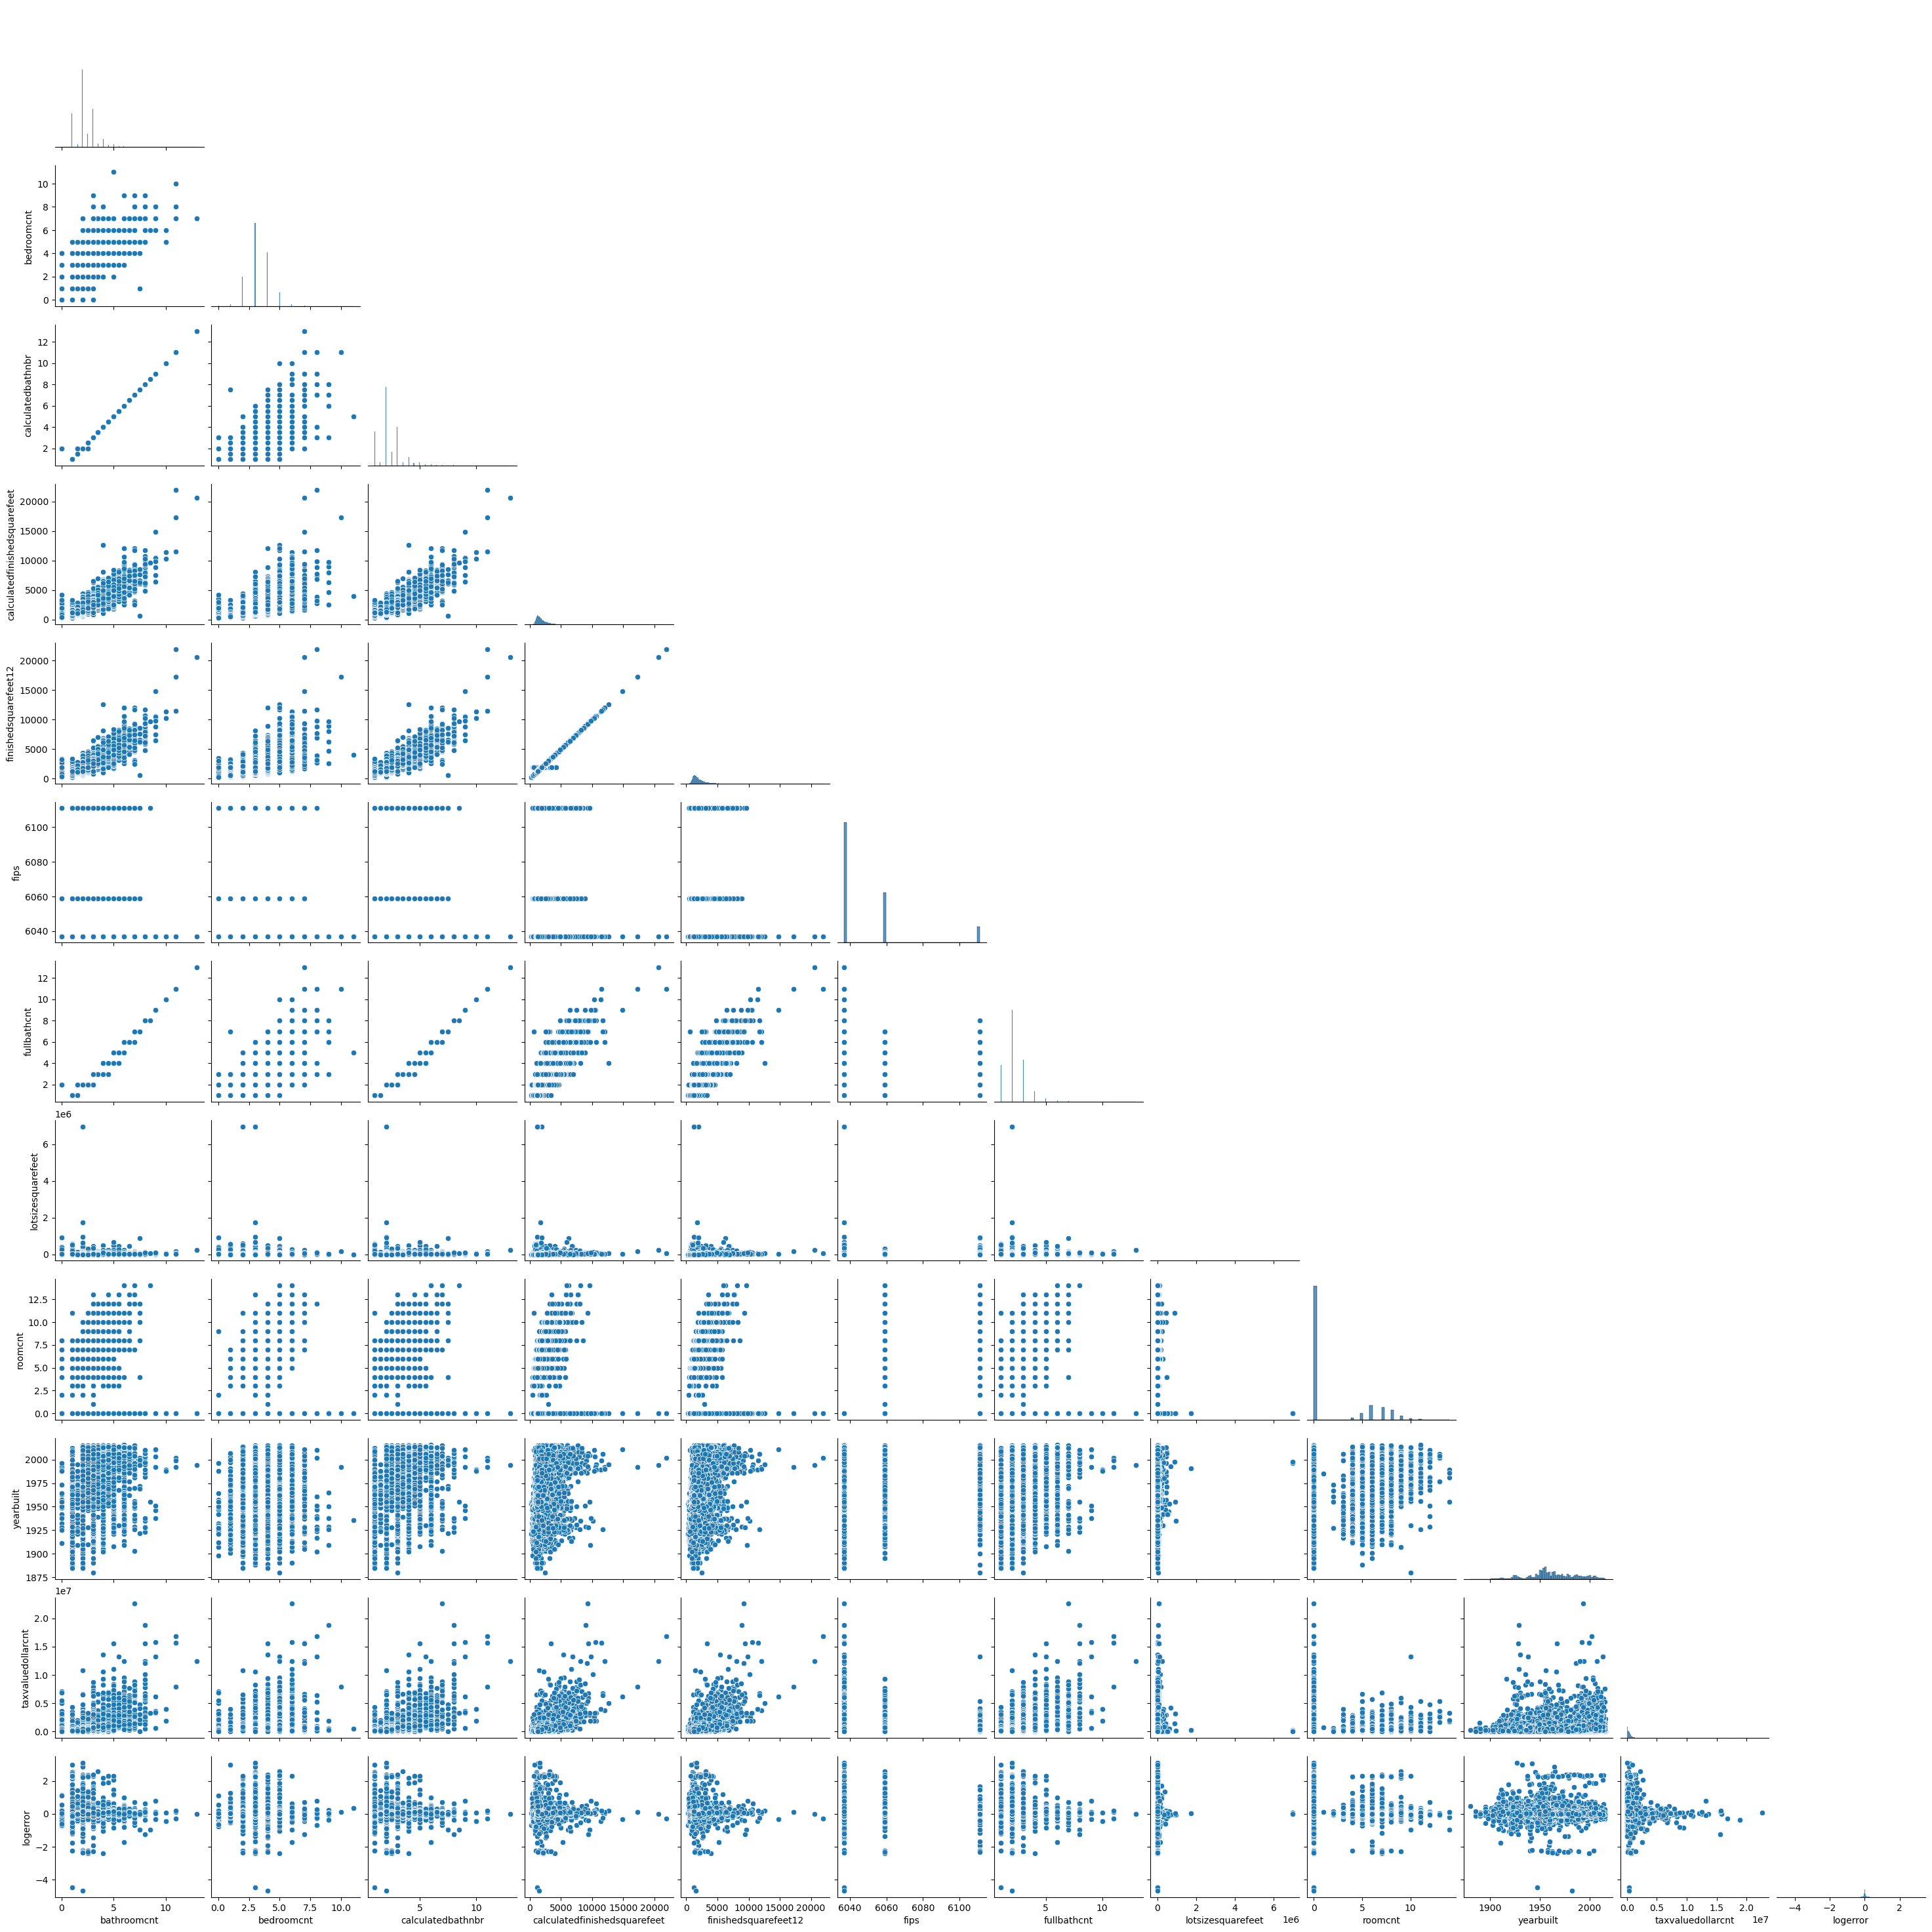

In [35]:
sns.pairplot(data=train[cols],
             corner=True)
plt.show()

## Q1 What is the distribution of all features

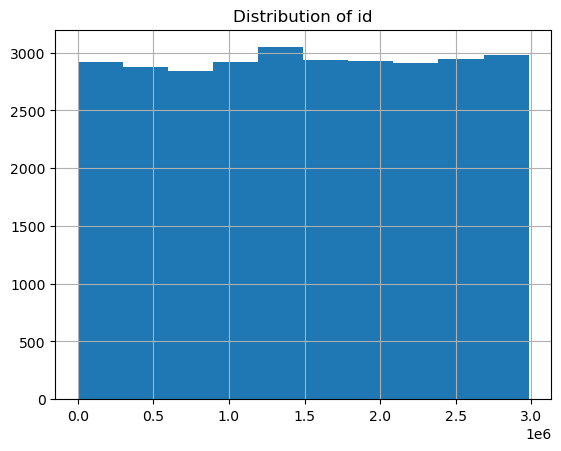

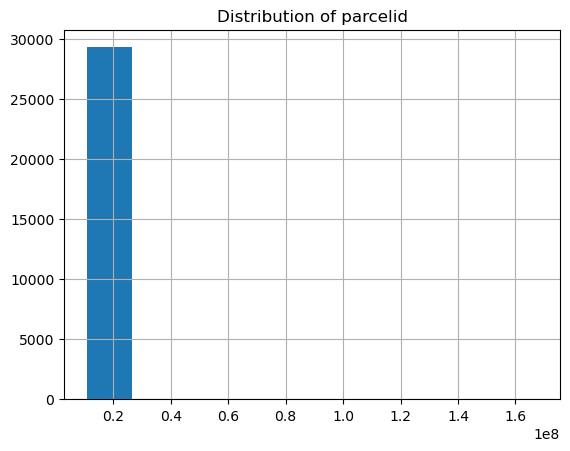

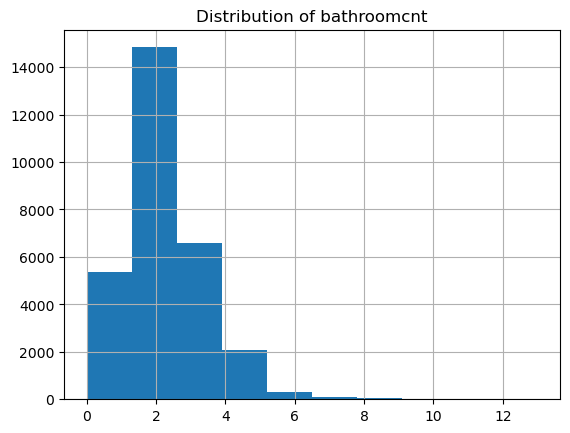

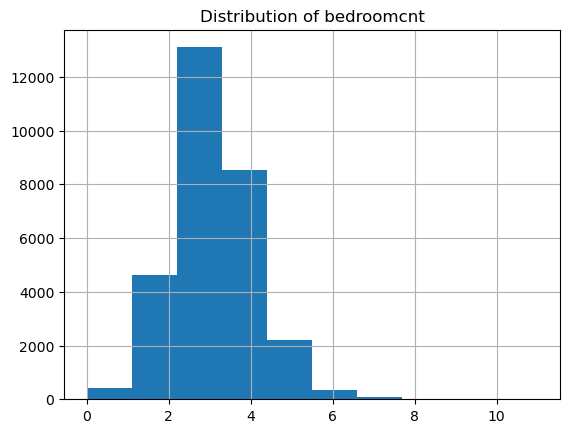

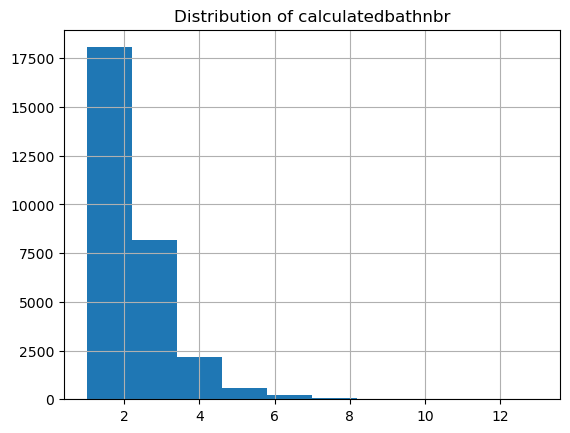

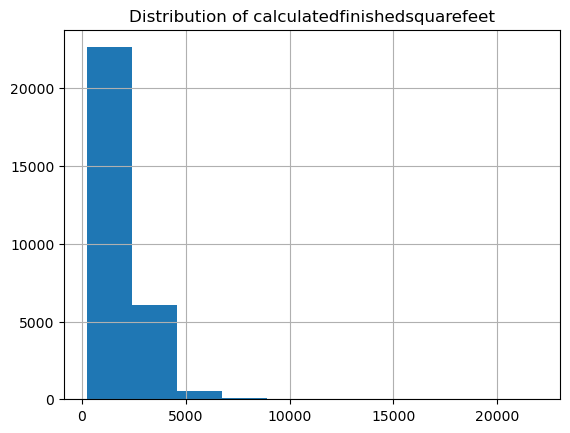

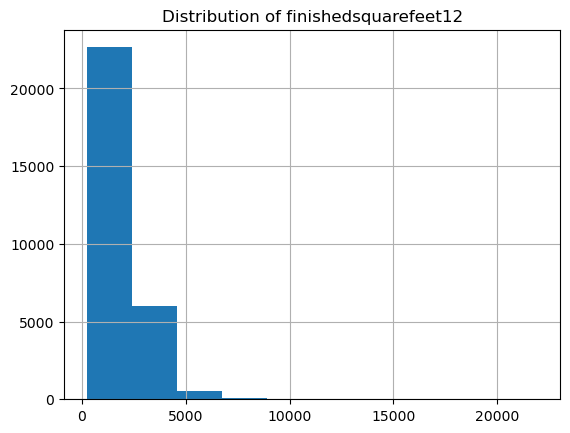

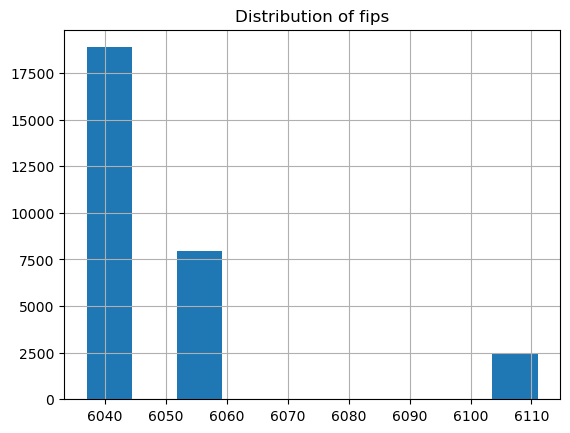

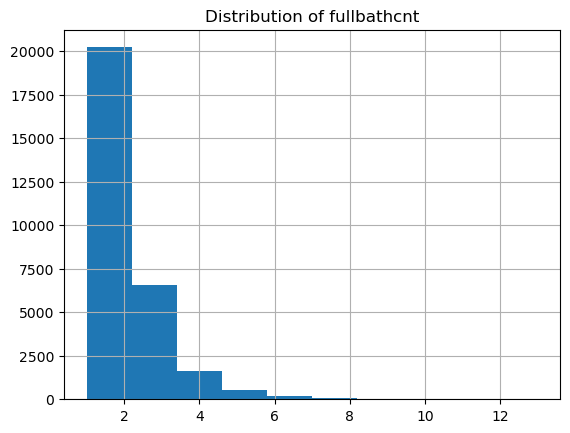

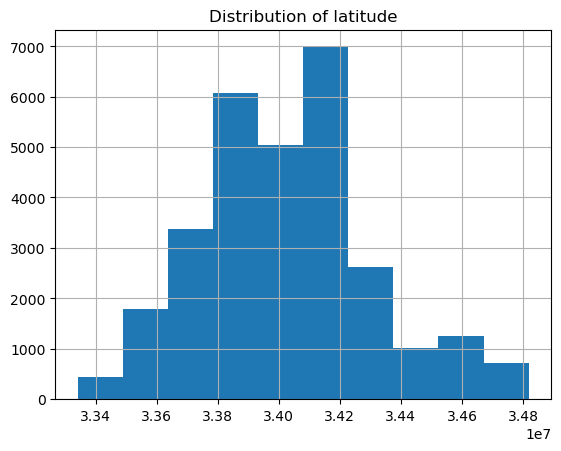

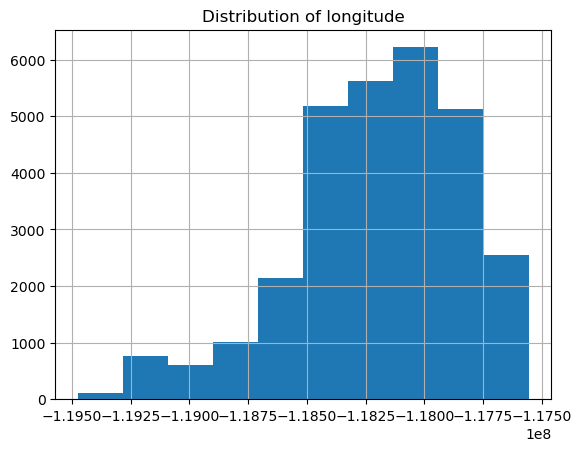

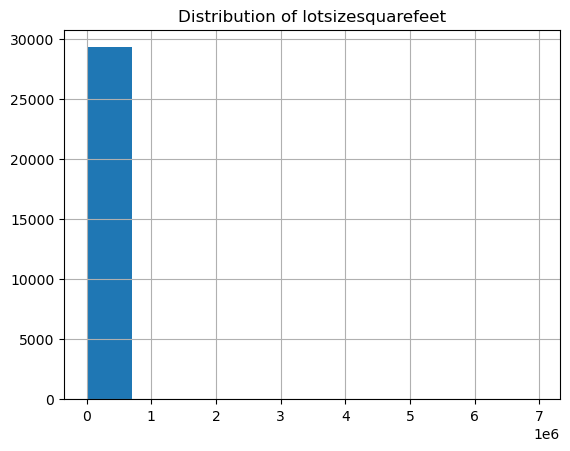

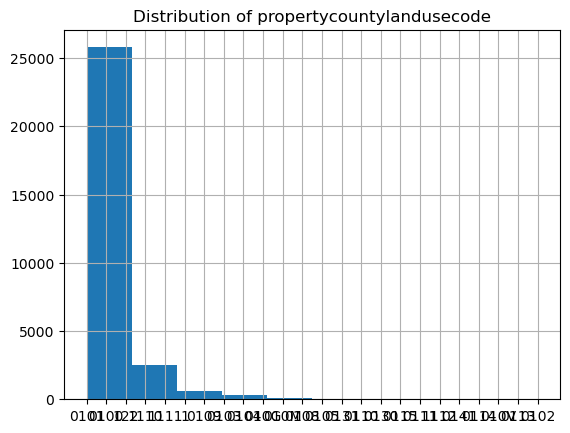

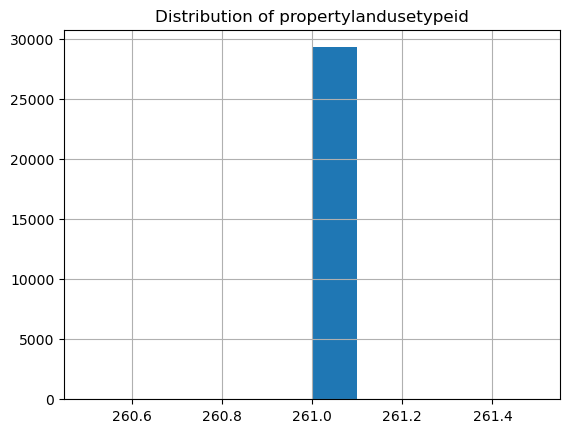

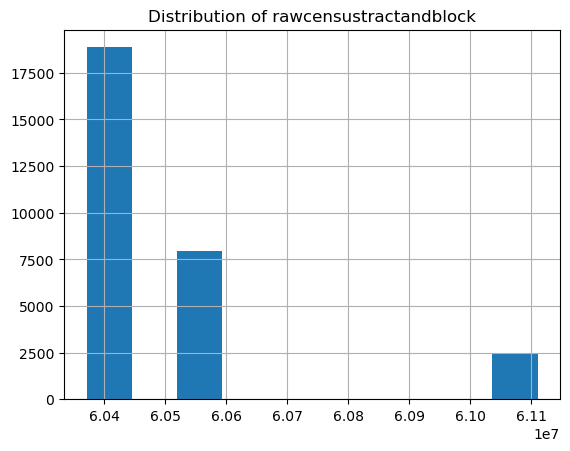

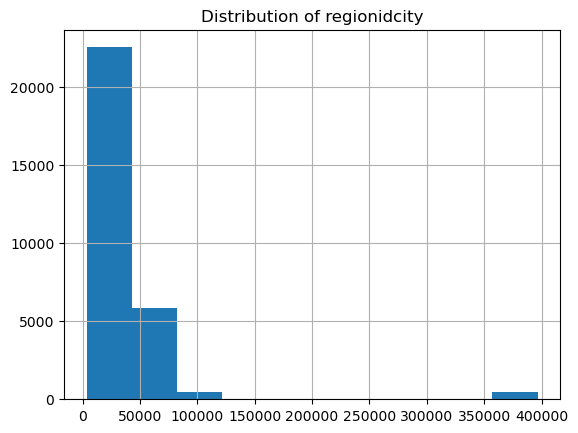

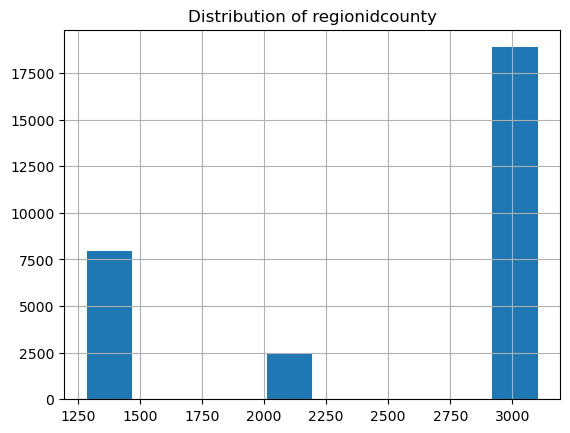

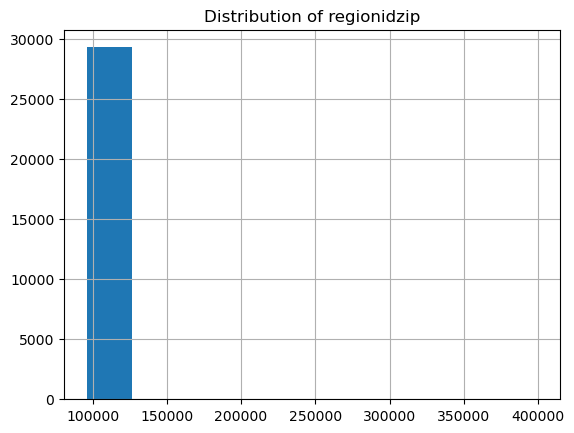

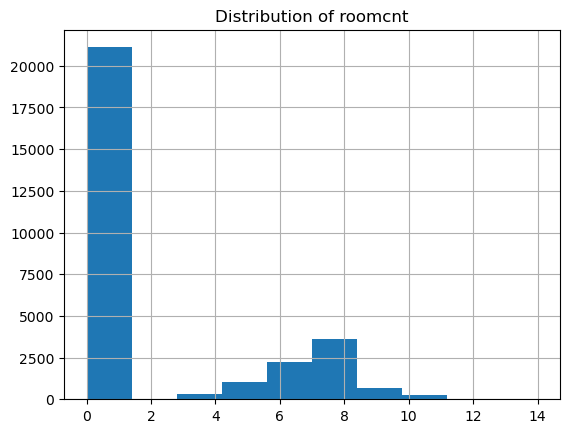

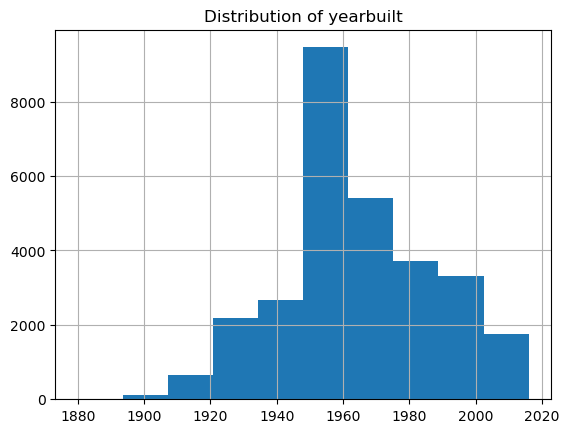

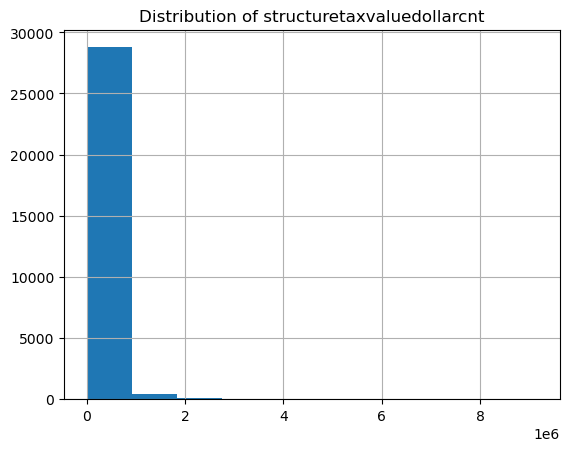

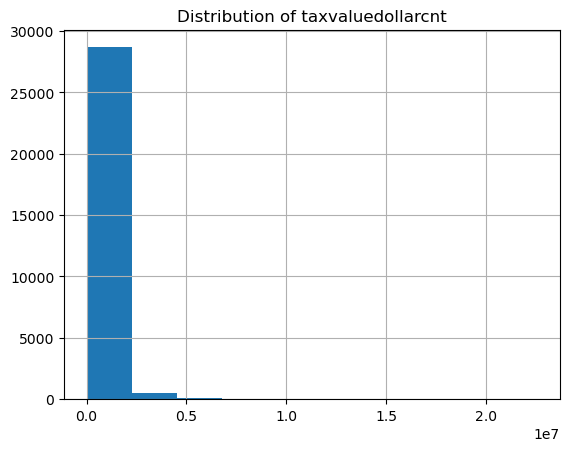

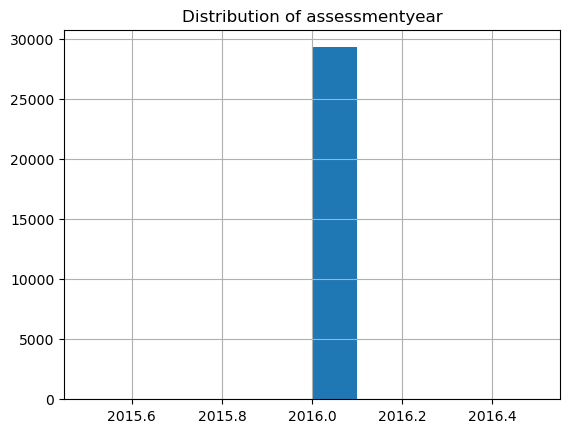

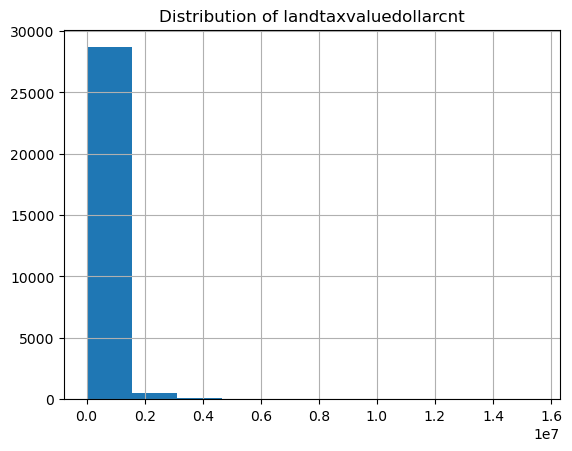

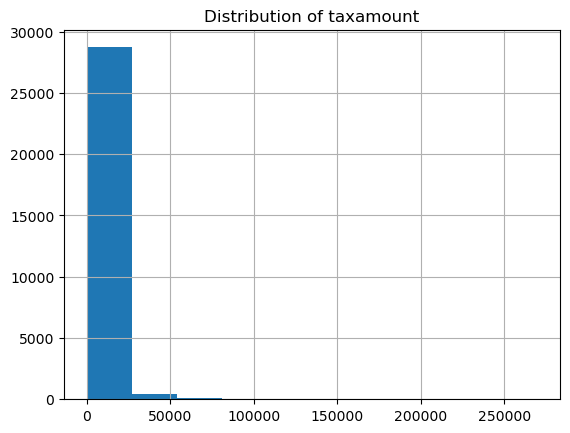

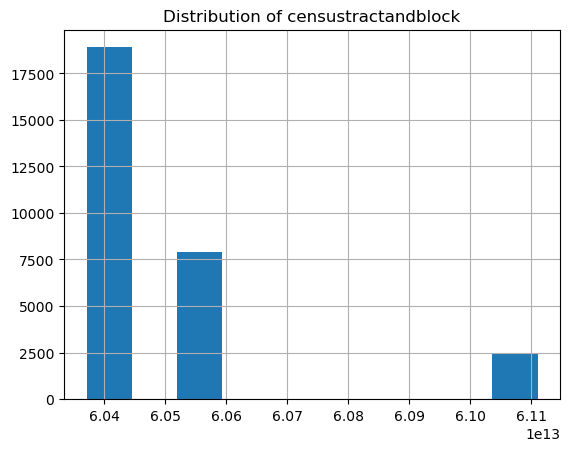

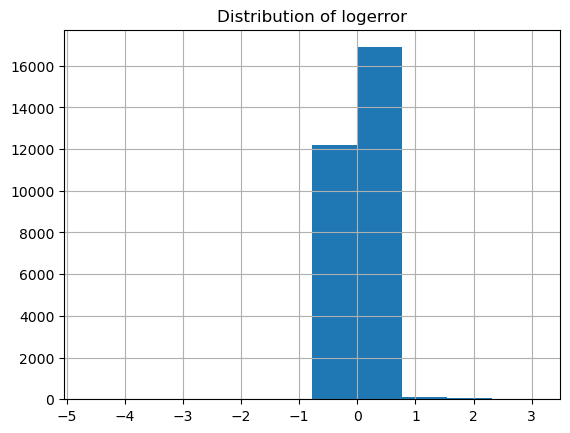

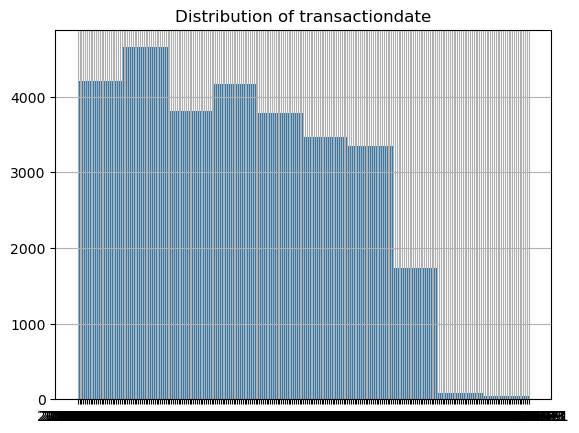

In [10]:
for col in train.columns[:-1]:
    train[col].hist()
    plt.title(f'Distribution of {col}')
    plt.show()

### Takaways
- distribution of bedroomcnt and bathroomcnt failry normaly distributed 
- year built pretty normal distribution 
- calculated squarefeet right skewed 
- roomcnt very non normal distribution
- fips 6037 has majority 


### Q2 Does distribtion of bedroomcnt differ between different fips?

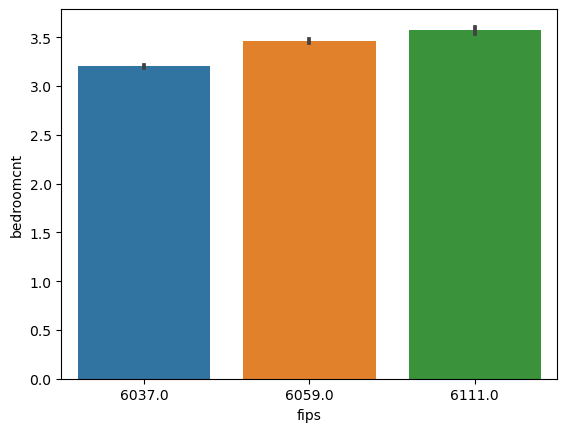

In [14]:
sns.barplot(data=train, x='fips', y='bedroomcnt')
plt.show()

In [19]:
observed = pd.crosstab(train['bedroomcnt'], train['fips'])
observed

fips,6037.0,6059.0,6111.0
bedroomcnt,,,
0.0,38,33,10
1.0,252,59,11
2.0,3634,810,186
3.0,8768,3361,971
4.0,4727,2794,1005
5.0,1182,762,265
6.0,218,91,33
7.0,44,19,4
8.0,12,0,1


### H$_o$: Distribution between fips and bedroomcnt do not differ
### H$_a$: Distribution between fips and bedroomcnt are different

In [23]:
a = 0.05

In [21]:
chi2, p, _, hypothetical = stats.chi2_contingency(observed)

In [24]:
if p < a:
    print(f'We can reject our null hypothesis: {p} < {a}')
else:
    print('We have failed to reject our null hypothesis')

We can reject our null hypothesis: 1.5433274080897558e-183 < 0.05


In [40]:
train.columns

(Index(['id', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
        'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
        'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
        'propertycountylandusecode', 'propertylandusetypeid',
        'rawcensustractandblock', 'regionidcity', 'regionidcounty',
        'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
        'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
        'taxamount', 'censustractandblock', 'logerror', 'transactiondate',
        'propertylandusedesc'],
       dtype='object'),)

### Q2 what is the relationship between tax_value and area 

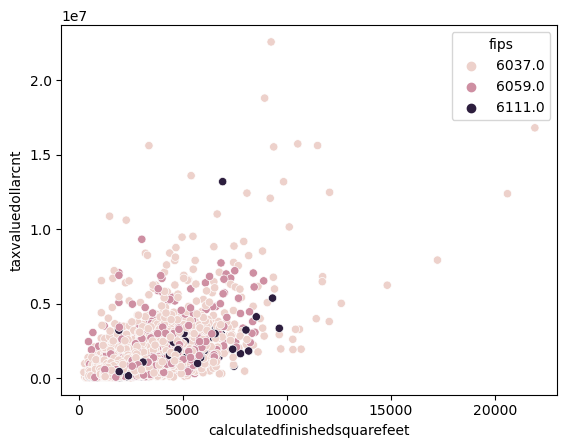

In [46]:
sns.scatterplot(data=train, x='calculatedfinishedsquarefeet', y='taxvaluedollarcnt', hue='fips')
plt.show()

- seems to have have correlation between the two
- no clustering when hue'd for fips

### H$_o$: relationship between tax value and area does not correlate
### H$_a$: relationship between tax value and area does correlate

In [51]:
stats.spearmanr(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)

SpearmanrResult(correlation=0.5307157003022951, pvalue=0.0)

In [ ]:
# can reject the null

### Q3 What is the relationship between logerror and area?

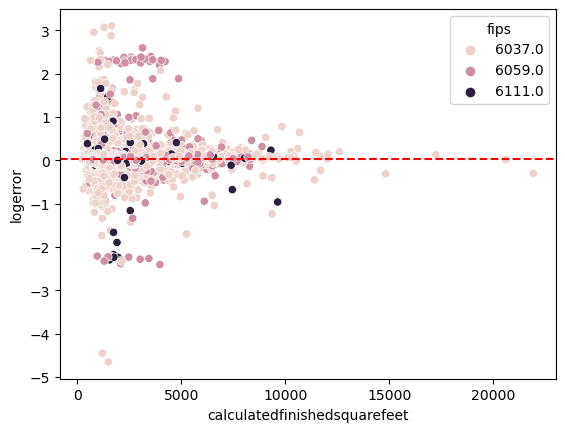

In [84]:
sns.scatterplot(data=train, x='calculatedfinishedsquarefeet', y='logerror', hue='fips')
mean_logerror = train['logerror'].mean()
plt.axhline(mean_logerror, color='r', linestyle='--')
plt.show()

- no correlation 
- some possible clustering


### H$_o$: There is no relation between area and logerror
### H$_a$: There is a relation between area and logerror

In [77]:
stats.spearmanr(train.calculatedfinishedsquarefeet, train.logerror)

SpearmanrResult(correlation=0.07683447035735853, pvalue=1.298999376053926e-39)

### Q4 Is there a  between logerror and fips

<AxesSubplot:xlabel='fips', ylabel='logerror'>

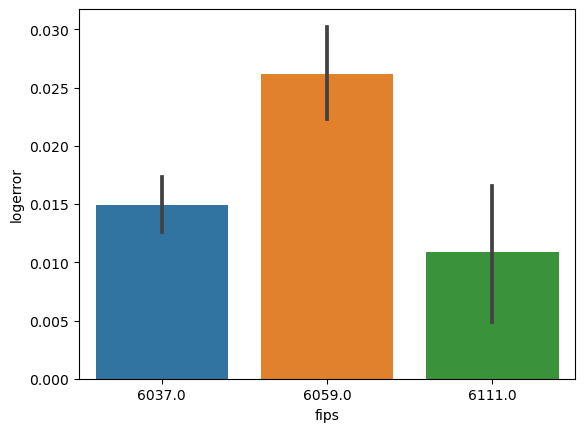

In [87]:
sns.barplot(data=train, x='fips', y='logerror')

- fips 6059 has higer error

In [90]:
stats.levene(train['logerror'],
             train['fips'])

LeveneResult(statistic=9715.658946784253, pvalue=0.0)

In [91]:
#stats.ttest_ind
stats.ttest_ind(train['logerror'],
             train['fips'],
               equal_var=False)

Ttest_indResult(statistic=-49026.72079324027, pvalue=0.0)

In [68]:
train.columns

Index(['id', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock', 'logerror', 'transactiondate',
       'propertylandusedesc'],
      dtype='object')

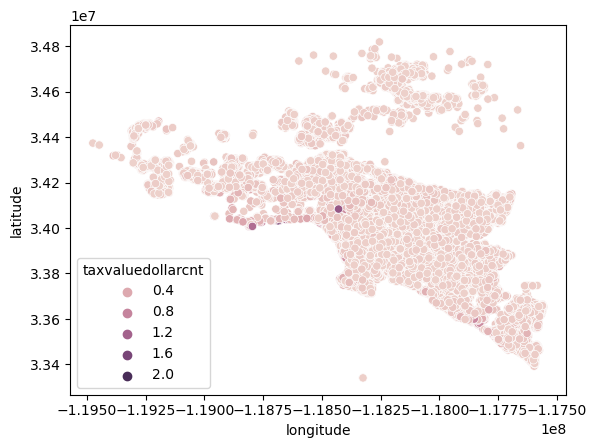

In [83]:
sns.scatterplot(data=train, x='longitude', y='latitude', hue='taxvaluedollarcnt')
plt.show()